In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import scipy.signal
import os
import requests
import tarfile
from scipy.io import wavfile

# Download LJ Speech Dataset
!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2

# Extract only the first 30 WAV files
download_dir = "LJSpeech-1.1"
os.makedirs(download_dir, exist_ok=True)

with tarfile.open("LJSpeech-1.1.tar.bz2", "r:bz2") as file:
    count = 0
    for member in file.getmembers():
        if member.name.endswith(".wav") and count < 30:
            file.extract(member, path=".")
            count += 1
        if count >= 30:
            break

print(f"Downloaded 30 audio samples to: {download_dir}")



--2025-05-04 14:02:34--  https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2
Resolving data.keithito.com (data.keithito.com)... 185.93.1.250, 2400:52e0:1a00::941:1
Connecting to data.keithito.com (data.keithito.com)|185.93.1.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2748572632 (2.6G) [text/plain]
Saving to: ‘LJSpeech-1.1.tar.bz2’

LJSpeech-1.1.tar.bz 100%[===================>]   2.56G   117MB/s    in 28s     

2025-05-04 14:03:02 (93.2 MB/s) - ‘LJSpeech-1.1.tar.bz2’ saved [2748572632/2748572632]

Downloaded 30 audio samples to: LJSpeech-1.1


In [17]:
# Select a sample file
sample_file = "/content/LJSpeech-1.1/wavs/LJ013-0181.wav"
signal, sr = librosa.load(sample_file, sr=16000)


In [18]:
frame_duration = 0.025
frame_length = int(frame_duration * sr)
start_index = 1000
end_index = start_index + frame_length
sample_frame = signal[start_index:end_index]
window = np.hamming(frame_length)
processed_frame = sample_frame * window


In [19]:
from scipy.fftpack import dct
fft_output = np.fft.fft(processed_frame)
magnitude_spectrum = np.abs(fft_output)
half_spectrum = magnitude_spectrum[:len(processed_frame) // 2]
energy_dft_total = np.sum(magnitude_spectrum ** 2)
dct_transformed = np.abs(dct(processed_frame, type=2, norm='ortho'))
energy_dct_total = np.sum(dct_transformed ** 2)

In [20]:
def compute_energy_percentage(coeff_array, count, total_energy_value):
    selected_energy = np.sum(coeff_array[:count] ** 2)
    energy_percent = (selected_energy / total_energy_value) * 100
    return energy_percent

coeff_counts = [10, 20, 30, 40]
energy_dft = []
energy_dct = []

dft_result = np.fft.fft(processed_frame)
dct_result = scipy.fftpack.dct(processed_frame)

total_dft_energy = np.sum(np.abs(dft_result)**2)
total_dct_energy = np.sum(np.abs(dct_result)**2)


print("Energy Distribution Across Coefficients:")
for count in coeff_counts:
    percent_dft = compute_energy_percentage(dft_result, count, total_dft_energy)
    percent_dct = compute_energy_percentage(dct_result, count, total_dct_energy)

    energy_dft.append(percent_dft)
    energy_dct.append(percent_dct)

    print(f"Top {count} Coefficients:")
    print(f"  DFT: {percent_dft:.4f}% of total energy")
    print(f"  DCT: {percent_dct:.4f}% of total energy")

Energy Distribution Across Coefficients:
Top 10 Coefficients:
  DFT: -3.5942-4.1350j% of total energy
  DCT: 0.2460% of total energy
Top 20 Coefficients:
  DFT: -11.5897-9.7296j% of total energy
  DCT: 12.8802% of total energy
Top 30 Coefficients:
  DFT: -11.7046-9.4624j% of total energy
  DCT: 52.2370% of total energy
Top 40 Coefficients:
  DFT: -12.0782-8.8267j% of total energy
  DCT: 90.3623% of total energy


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_histograms_impl.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.11/dist-packages/matplotlib/axes/_axes.py:7096: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


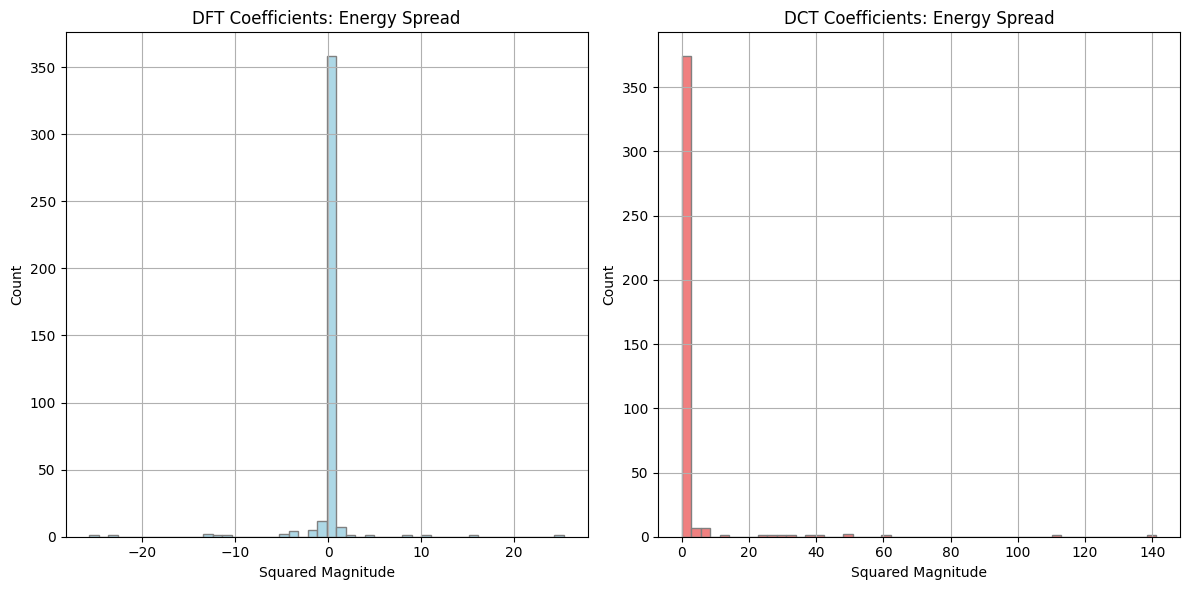

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(np.square(dft_result), bins=50, color='lightblue', edgecolor='gray')
plt.title('DFT Coefficients: Energy Spread')
plt.xlabel('Squared Magnitude')
plt.ylabel('Count')
plt.grid(visible=True)

plt.subplot(1, 2, 2)
plt.hist(np.square(dct_result), bins=50, color='lightcoral', edgecolor='gray')
plt.title('DCT Coefficients: Energy Spread')
plt.xlabel('Squared Magnitude')
plt.ylabel('Count')
plt.grid(visible=True)

plt.tight_layout()
plt.show()


In [22]:
mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

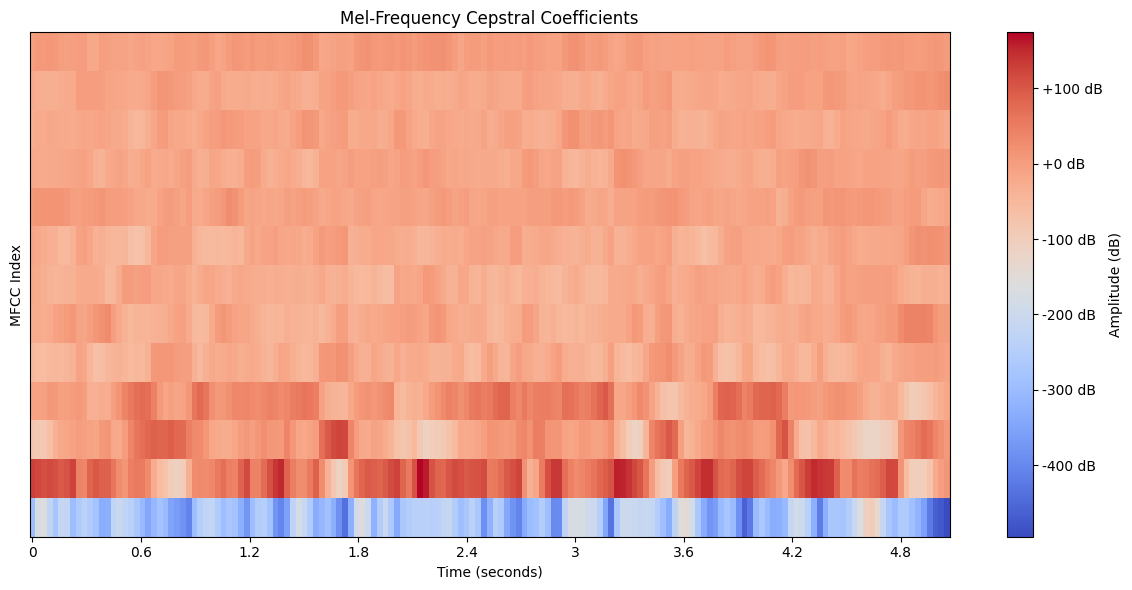

In [23]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc_features, sr=sr, x_axis='time', cmap='coolwarm')
plt.colorbar(label='Amplitude (dB)', format='%+2.0f dB')
plt.title('Mel-Frequency Cepstral Coefficients')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Index')
plt.tight_layout()
plt.show()

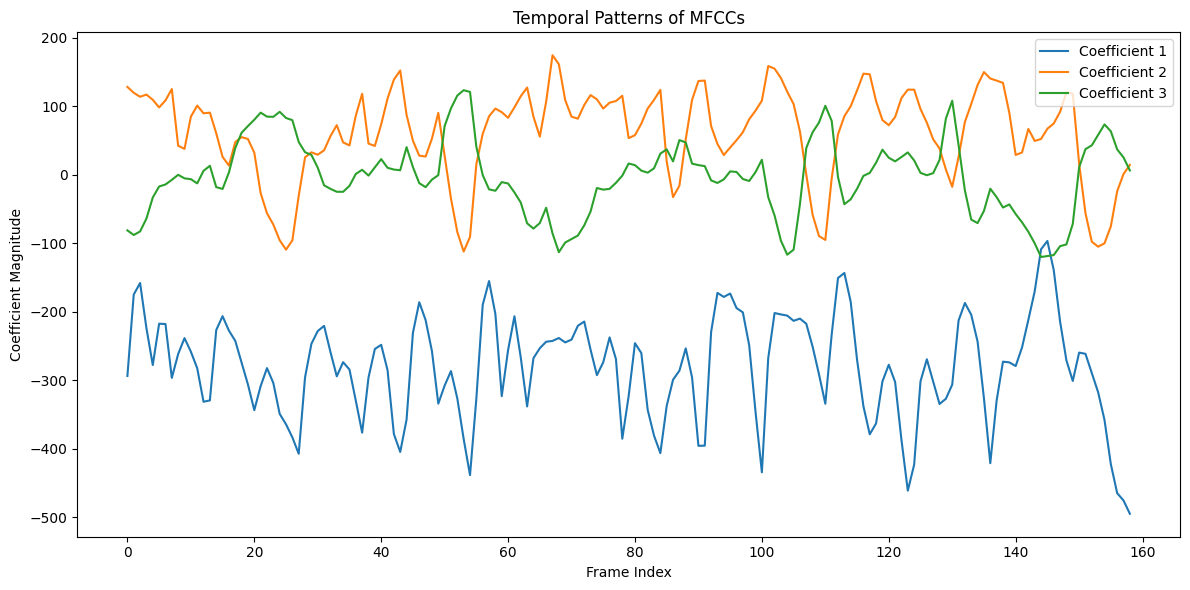

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(mfcc_features[0], label='Coefficient 1')
plt.plot(mfcc_features[1], label='Coefficient 2')
plt.plot(mfcc_features[2], label='Coefficient 3')
plt.title('Temporal Patterns of MFCCs')
plt.xlabel('Frame Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
